## Here, we used new training data that has randomized dispersions and phases to try and predict the dispersion as well as the phase.


In [1]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *

from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  



## This function will plot the true vs. predicted with various line fits
def plotSummary(true, predicted, name):
    #from pylab import *
    #import numpy as np
    #import matplotlib.pyplot as plt
    
    figure()
    plt.scatter(true,predicted, alpha = 0.2)
    
    plt.title(name)
    plt.xlabel('True')
    plt.ylabel('Predicted')

    xmin, xmax = plt.xlim()
    plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

    fit_temp = np.polyfit(true, predicted,1)
    xp = np.linspace(xmin, xmax, 100)
    p = np.poly1d(fit_temp)
    plt.plot(xp, p(xp), '-', color = 'black')
    
    print(' ')
    print('RMSE on test data:', np.sqrt(mean_squared_error(true, predicted)), 'for ', name)
    print('R^2 Score on test data:', r2_score(true, predicted), 'for', name)

    
    return

def myResiduals(testY, predictY):
    ## residuals 1
    i = 0 # resetting i
    iterations = len(testY) # gets number of dots/points
    residual_sum = 0 # initializes sum of residuals
    for i in range (0,iterations): # for every dot/point
       ys = testY # get ys of testing data
       ys = ys.values # take out indexing, data types, names
       y = ys[i]
       predict_ys = predictY.values # get ys of all dots/points
       predict_y = predict_ys[i] # get the y value of the dot/point at specfic x value i
       diff = y - predict_y # find the difference in height
       diff = abs(diff) # take the absolute value
       residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals
    residual_average = residual_sum/iterations # find the average of the residuals
    print('The average residual for predict:', round(residual_average,4)) # display average of residuals

    minY = min(ys) # find the minimum y value for testing data
    maxY = max(ys) # find the max y value for testing data
    minpredict = min(predictY) # find the min y value for the prediction data
    maxpredict = max(predictY) # find the max y value for the prediction data
    #print('minY', minY, 'maxY', maxY)
    #print('minpredict', minpredict, 'maxpredict', maxpredict)
    rangeY = minY + maxY # find the range of the testing data
    rangepredict = minpredict - maxpredict # find the range of the predictions
    #print('rangeY', rangeY)
    #print('rangepredict', rangepredict)
    residual_percent_rangepredict = (residual_average/abs(rangepredict))*100 # calculate what percent the residual is of the range
    print('Residual is this percent of predict range', round(residual_percent_rangepredict,3), '%')
    
    return
    

In [2]:
#Load the training data


peak_names = ['peak1', 'peak2', 'peak3', 'peak4']
locs_names = ['loc1', 'loc2', 'loc3', 'loc4']
width_names = ['width1', 'width2', 'width3','width4']
prom_names = ['prom1', 'prom2', 'prom3', 'prom4']

energy = (pd.read_csv('Training_Data/Hexagon/HexagonBias_v4.csv', header=None)*1000).round().astype(int)
energy_names = ['E_%i_mV' % item for item in list(energy.T[0])]

col_names2 = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']+ peak_names + locs_names + width_names + prom_names

col_names1 = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'] + energy_names

data1 = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData062718_v9_specPoints.csv', header = None, names = col_names1)
data2 = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData062718_v9_peakinfo.csv', header = None, names = col_names2)


X1 = data1.drop(['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'], axis = 1)
Y1 = data1[['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']]

X2 = data2.drop(['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'], axis = 1)
Y2 = data2[['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']]

ts1 = 0.3
rs1 = 42

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = ts1, random_state = rs1)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = ts1, random_state = rs1)

data1.head()

,deltaI,deltaR,E_0,mstar,alpha,E_-400_mV,E_-398_mV,E_-396_mV,E_-394_mV,E_-392_mV,...,E_482_mV,E_484_mV,E_486_mV,E_488_mV,E_490_mV,E_492_mV,E_494_mV,E_496_mV,E_498_mV,E_500_mV
0,0.81472,-0.147980,0.41370,0.43701,-8.6764,3.26000,9.882200,2.334900,0.90287,0.50180,...,0.62323,0.62371,0.62546,0.62839,0.63288,0.63869,0.64565,0.65423,0.66432,0.67559
1,0.09754,-1.133300,0.45569,0.44363,-5.3511,0.05461,0.065858,0.081225,0.10324,0.13743,...,0.12581,0.12903,0.13200,0.13683,0.14167,0.14810,0.15516,0.16464,0.17402,0.18740
2,0.15761,-0.046193,0.49672,0.37281,-6.9972,1.59930,1.433100,1.286000,1.15800,1.04800,...,1.01510,1.01320,1.01100,1.00870,1.00640,1.00370,1.00110,0.99801,0.99497,0.99171
3,0.14189,-0.908300,0.49257,0.41883,-5.4051,0.26500,0.202940,0.161420,0.13384,0.11383,...,0.15534,0.15561,0.15664,0.15788,0.15934,0.16199,0.16514,0.16840,0.17335,0.17833
4,0.65574,-1.514700,0.48591,0.44010,-8.2126,1.26620,0.866940,0.637450,0.49386,0.39818,...,1.21800,1.23370,1.25490,1.28390,1.32290,1.36940,1.42420,1.48600,1.55150,1.61830


In [3]:
data2.head()

,deltaI,deltaR,E_0,mstar,alpha,peak1,peak2,peak3,peak4,loc1,...,loc3,loc4,width1,width2,width3,width4,prom1,prom2,prom3,prom4
0,0.81472,-0.147980,0.41370,0.43701,-8.6764,9.8822,5.5667,3.6113,2.7913,-0.398,...,-0.232,-0.084,0.001877,0.009717,0.019692,0.029163,6.6222,5.34590,3.23250,2.25190
1,0.09754,-1.133300,0.45569,0.44363,-5.3511,18.0630,16.8260,12.9150,9.8592,-0.378,...,-0.124,0.072,0.003477,0.004698,0.007322,0.009501,18.0080,16.74500,12.80400,9.73970
2,0.15761,-0.046193,0.49672,0.37281,-6.9972,1.7381,1.4604,1.2477,1.1347,-0.292,...,0.110,0.386,0.042705,0.056824,0.079090,0.080406,1.0521,0.62049,0.36429,0.14303
3,0.14189,-0.908300,0.49257,0.41883,-5.4051,14.0020,12.3480,8.9410,6.3451,-0.304,...,0.060,0.308,0.005644,0.007879,0.010993,0.014262,13.9150,12.22200,8.78560,6.14070
4,0.65574,-1.514700,0.48591,0.44010,-8.2126,5.8682,4.4592,3.2560,2.4006,-0.302,...,0.038,0.262,0.012698,0.019628,0.026555,0.032085,5.6336,4.10670,2.83680,1.88050


## Using the Best Models on the Hexagon Data - specPoints

### Statsmodels - specPoints

 
RMSE on test data: 1.1556678827277582 for  Delta I
R^2 Score on test data: -14.906706920118765 for Delta I
 
RMSE on test data: 0.6806914558975969 for  Delta R
R^2 Score on test data: -1.2937836041209696 for Delta R
 
RMSE on test data: 0.6806914558975969 for  Delta R Zoomed In
R^2 Score on test data: -1.2937836041209696 for Delta R Zoomed In
 
RMSE on test data: 0.06193691533620863 for  E_0
R^2 Score on test data: -3.5662444879924067 for E_0
 
RMSE on test data: 0.09504406105898644 for  m star
R^2 Score on test data: -3.7489553243161655 for m star
 
RMSE on test data: 12.96948685271914 for  alpha
R^2 Score on test data: -19.37283557733294 for alpha
The average residual for predict: 0.3203
Residual is this percent of predict range 0.526 %
The average residual for predict: 0.4262
Residual is this percent of predict range 1.641 %


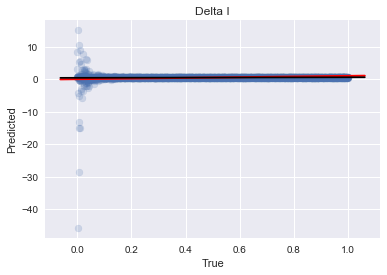

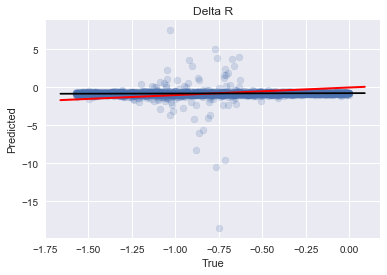

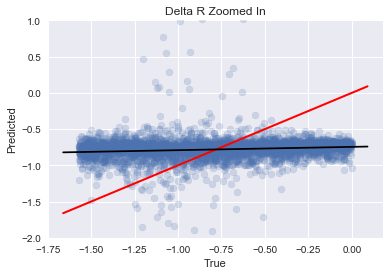

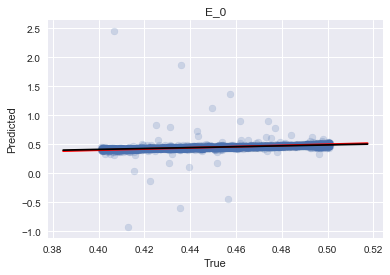

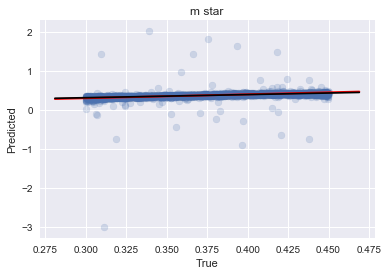

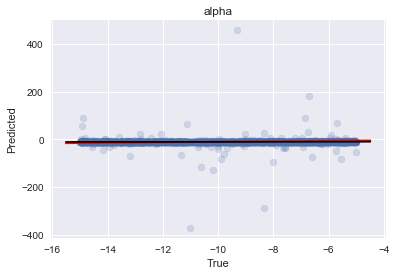

In [4]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_sp = sm.OLS(Y1_train['deltaI'], X1_train)
model_OLS_R_sp = sm.OLS(Y1_train['deltaR'], X1_train)
model_OLS_E0_sp = sm.OLS(Y1_train['E_0'], X1_train)
model_OLS_mstar_sp = sm.OLS(Y1_train['mstar'], X1_train)
model_OLS_alpha_sp = sm.OLS(Y1_train['alpha'], X1_train)

results_OLS_I_sp = model_OLS_I_sp.fit()
results_OLS_R_sp = model_OLS_R_sp.fit()
results_OLS_E0_sp = model_OLS_E0_sp.fit()
results_OLS_mstar_sp = model_OLS_mstar_sp.fit()
results_OLS_alpha_sp = model_OLS_alpha_sp.fit()

#Make predictions on testing data
predictions_OLS_I_sp = results_OLS_I_sp.predict(X1_test) # make the predictions by the model
predictions_OLS_R_sp = results_OLS_R_sp.predict(X1_test)
predictions_OLS_E0_sp = results_OLS_E0_sp.predict(X1_test)
predictions_OLS_mstar_sp = results_OLS_mstar_sp.predict(X1_test)
predictions_OLS_alpha_sp = results_OLS_alpha_sp.predict(X1_test)

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y1_test['deltaI'], predictions_OLS_I_sp,'Delta I')
#ylim([-1,5])
plotSummary(Y1_test['deltaR'], predictions_OLS_R_sp, 'Delta R')
plotSummary(Y1_test['deltaR'], predictions_OLS_R_sp, 'Delta R Zoomed In')
ylim([-2,1])
plotSummary(Y1_test['E_0'], predictions_OLS_E0_sp, 'E_0')
plotSummary(Y1_test['mstar'], predictions_OLS_mstar_sp, 'm star')
plotSummary(Y1_test['alpha'], predictions_OLS_alpha_sp, 'alpha')

myResiduals(Y1_test['deltaI'], predictions_OLS_I_sp)
myResiduals(Y1_test['deltaR'], predictions_OLS_R_sp)



### Decision Tree - specPoints

 
RMSE on test data: 0.25346119407198614 for  deltaI Depth 60
R^2 Score on test data: 0.2348666280489624 for deltaI Depth 60
 
RMSE on test data: 0.36691045443162396 for  deltaR Depth 60
R^2 Score on test data: 0.33354317759505425 for deltaR Depth 60
 
RMSE on test data: 0.018509583332061885 for  E_0
R^2 Score on test data: 0.5921942908705966 for E_0
 
RMSE on test data: 0.027365146947050036 for  mstar
R^2 Score on test data: 0.6063196991870993 for mstar
 
RMSE on test data: 2.7164066062781895 for  alpha
R^2 Score on test data: 0.10629240307275323 for alpha
 
Regression - Decision Tree -  Score:  0.11308678096311243 , using max depth of 30
 
Cross Validation Scores for regressor with max depth of  30  :  [0.34948971 0.36686406 0.31097884 0.28248218 0.30419361 0.27060054
 0.25353741 0.26083467 0.20853383 0.2357081 ]


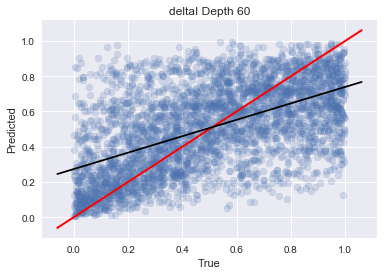

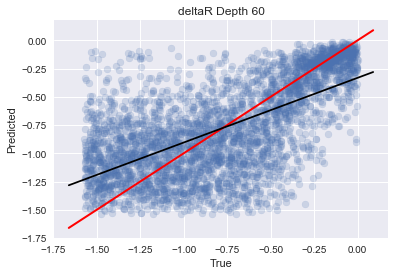

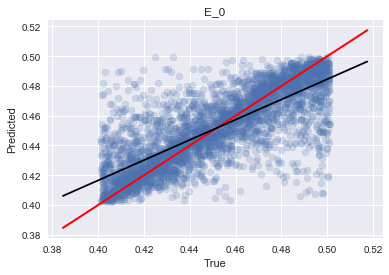

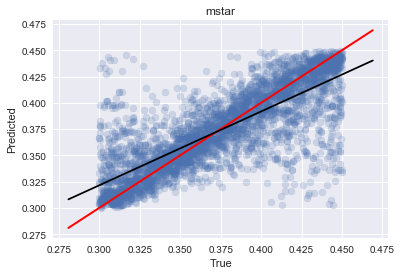

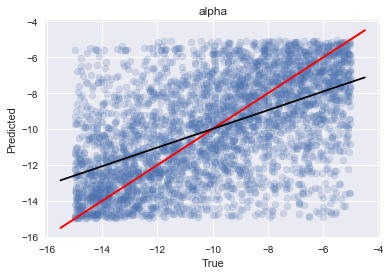

In [5]:
#Initialize the model
rs = 42
regr_DT_sp = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_sp = regr_DT_sp.fit(X1_train, Y1_train)


#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_sp = regr_DT_sp.predict(X1_test)

#Plot results
plotSummary(Y1_test['deltaI'], predictions_DT_sp[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y1_test['deltaR'], predictions_DT_sp[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])
plotSummary(Y1_test['E_0'], predictions_DT_sp[:,2], 'E_0')
plotSummary(Y1_test['mstar'], predictions_DT_sp[:,3], 'mstar')
plotSummary(Y1_test['alpha'], predictions_DT_sp[:,4], 'alpha')

print(' ')

#Trying to understand the scoring
print('Regression - Decision Tree -  Score: ', regr_DT_sp.score(X1_test,Y1_test),', using max depth of 30')
print(' ')
regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print( 'Cross Validation Scores for regressor with max depth of ', regressor.max_depth, ' : ', cross_val_score(regressor, X1, Y1, cv=10))

### Random Forest - specPoints


Score - Random Forest: 0.5980509831859119 for delta I/R 10
 
RMSE on test data: 0.18181834104154124 for  deltaI 10
R^2 Score on test data: 0.606278099204129 for deltaI 10
 
RMSE on test data: 0.2520577189056307 for  deltaR 10
R^2 Score on test data: 0.6854774061072131 for deltaR 10
 
RMSE on test data: 0.010506253920221652 for  E0
R^2 Score on test data: 0.8686119696510906 for E0
 
RMSE on test data: 0.01448726734281917 for  mstar
R^2 Score on test data: 0.8896630273995754 for mstar
 
RMSE on test data: 1.826967563537378 for  alpha
R^2 Score on test data: 0.5957336742343076 for alpha


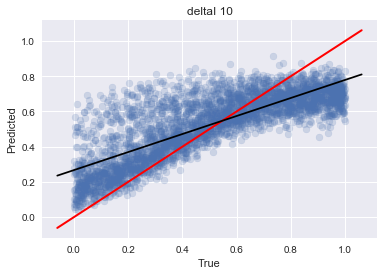

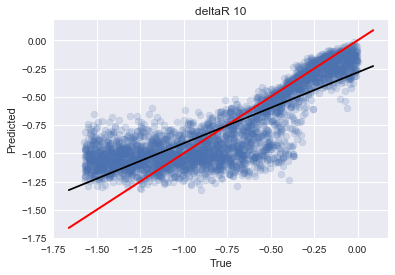

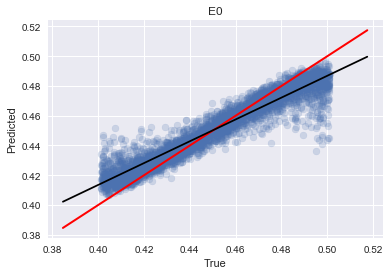

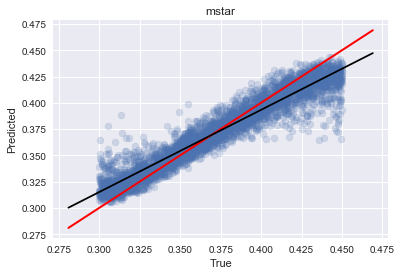

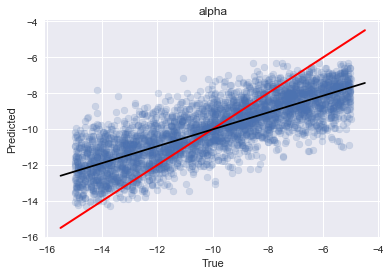

In [6]:
rs = 42
regr_RF_sp = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_sp = regr_RF_sp.fit(X1_train, Y1_train)

predictions_RF_sp = model_RF_sp.predict(X1_test)

print('')
print('Score - Random Forest:' , model_RF_sp.score(X1_test, Y1_test), 'for delta I/R 10')

plotSummary(Y1_test['deltaI'], predictions_RF_sp[:,0], 'deltaI 10')
plotSummary(Y1_test['deltaR'], predictions_RF_sp[:,1], 'deltaR 10')
plotSummary(Y1_test['E_0'], predictions_RF_sp[:,2], 'E0')
plotSummary(Y1_test['mstar'], predictions_RF_sp[:,3], 'mstar')
plotSummary(Y1_test['alpha'], predictions_RF_sp[:,4], 'alpha')



### Independent Random Forests - specPoints


Score - Random Forest: 0.7388815009573555 for delta I/R 10
 
RMSE on test data: 0.22966398576063202 for  deltaI 10
R^2 Score on test data: 0.7388815009573554 for deltaI 10
 
RMSE on test data: 0.14703520347549878 for  deltaR 10
R^2 Score on test data: 0.7425120881684903 for deltaR 10
 
RMSE on test data: 0.0037845655980130177 for  E_0
R^2 Score on test data: 0.98295126771875 for E_0
 
RMSE on test data: 0.00946213624084815 for  mstar
R^2 Score on test data: 0.9529319172166584 for mstar
 
RMSE on test data: 1.768077611407698 for  alpha
R^2 Score on test data: 0.6213756477330679 for alpha


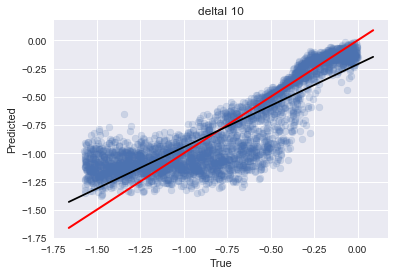

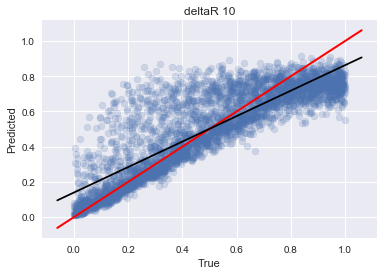

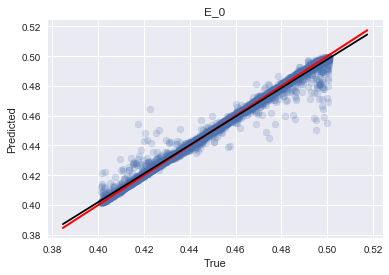

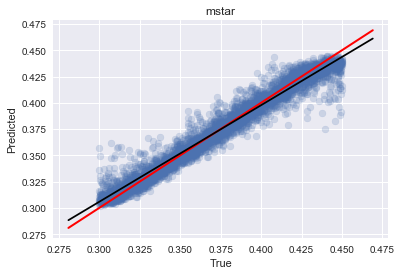

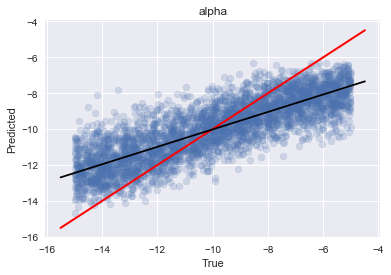

In [8]:
#Trying Independent Random Forest

rs = 42
md = 40
n = 40

regr_RF2_dr_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_E0_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_mstar_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_alpha_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)


model_RF2_dr_sp = regr_RF2_dr_sp.fit(X1_train, Y1_train['deltaR'])
model_RF2_di_sp = regr_RF2_di_sp.fit(X1_train, Y1_train['deltaI'])
model_RF2_E0_sp = regr_RF2_E0_sp.fit(X1_train, Y1_train['E_0'])
model_RF2_mstar_sp = regr_RF2_mstar_sp.fit(X1_train, Y1_train['mstar'])
model_RF2_alpha_sp = regr_RF2_alpha_sp.fit(X1_train, Y1_train['alpha'])

predictions_RF2_dr_sp = model_RF2_dr_sp.predict(X1_test)
predictions_RF2_di_sp = model_RF2_di_sp.predict(X1_test)
predictions_RF2_E0_sp = model_RF2_E0_sp.predict(X1_test)
predictions_RF2_mstar_sp = model_RF2_mstar_sp.predict(X1_test)
predictions_RF2_alpha_sp = model_RF2_alpha_sp.predict(X1_test)


#importance_RF_10 = pd.Series(model_RF2.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , model_RF2_dr_sp.score(X1_test, Y1_test['deltaR']), 'for delta I/R 10')

plotSummary(Y1_test['deltaR'], predictions_RF2_dr_sp, 'deltaI 10')
plotSummary(Y1_test['deltaI'], predictions_RF2_di_sp, 'deltaR 10')
plotSummary(Y1_test['E_0'], predictions_RF2_E0_sp, 'E_0')
plotSummary(Y1_test['mstar'], predictions_RF2_mstar_sp, 'mstar')
plotSummary(Y1_test['alpha'], predictions_RF2_alpha_sp, 'alpha')



### AdaBoost Random Forest - specPoints

 
RMSE on test data: 0.15463547869416025 for  AdaBoost Delta I
R^2 Score on test data: 0.7152049230798889 for AdaBoost Delta I
 
RMSE on test data: 0.23869157818987116 for  AdaBoost Delta R
R^2 Score on test data: 0.7179500433228341 for AdaBoost Delta R
 
RMSE on test data: 0.0029147979642042457 for  AdaBoost E_0
R^2 Score on test data: 0.9898870716211117 for AdaBoost E_0
 
RMSE on test data: 0.008591692039688771 for  AdaBoost mstar
R^2 Score on test data: 0.9611934067775739 for AdaBoost mstar
 
RMSE on test data: 1.8188255419603212 for  AdaBoost alpha
R^2 Score on test data: 0.5993289330671967 for AdaBoost alpha
Delta I AdaBoost Score: 0.7152049230798889
Delta R AdaBoost Score: 0.7179500433228341


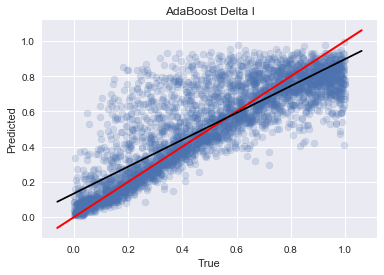

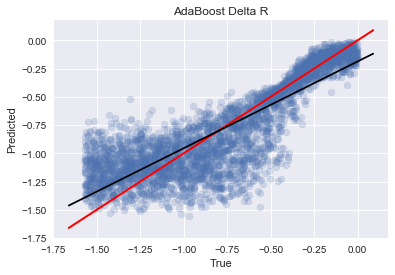

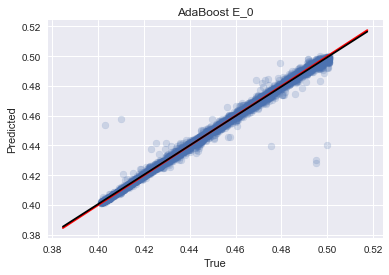

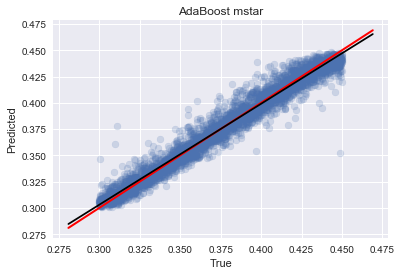

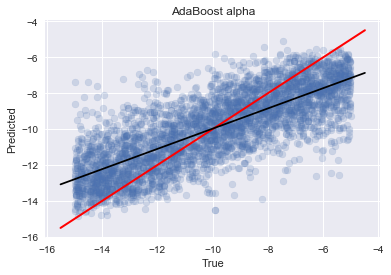

In [9]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)
regr_AB_E0_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_mstar_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_alpha_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)

model_AB_di_sp = regr_AB_di_sp.fit(X1_train, Y1_train['deltaI'])
model_AB_dr_sp = regr_AB_dr_sp.fit(X1_train, Y1_train['deltaR'])
model_AB_E0_sp = regr_AB_E0_sp.fit(X1_train, Y1_train['E_0'])
model_AB_mstar_sp = regr_AB_mstar_sp.fit(X1_train, Y1_train['mstar'])
model_AB_alpha_sp = regr_AB_alpha_sp.fit(X1_train, Y1_train['alpha'])

predictions_AB_di_sp = model_AB_di_sp.predict(X1_test)
predictions_AB_dr_sp = model_AB_dr_sp.predict(X1_test)
predictions_AB_E0_sp = model_AB_E0_sp.predict(X1_test)
predictions_AB_mstar_sp = model_AB_mstar_sp.predict(X1_test)
predictions_AB_alpha_sp = model_AB_alpha_sp.predict(X1_test)


plotSummary(Y1_test['deltaI'], predictions_AB_di_sp, 'AdaBoost Delta I')
plotSummary(Y1_test['deltaR'], predictions_AB_dr_sp, 'AdaBoost Delta R')
plotSummary(Y1_test['E_0'], predictions_AB_E0_sp, 'AdaBoost E_0')
plotSummary(Y1_test['mstar'], predictions_AB_mstar_sp, 'AdaBoost mstar')
plotSummary(Y1_test['alpha'], predictions_AB_alpha_sp, 'AdaBoost alpha')

print('Delta I AdaBoost Score:', model_AB_di_sp.score(X1_test, Y1_test['deltaI']))
print('Delta R AdaBoost Score:', model_AB_dr_sp.score(X1_test, Y1_test['deltaR']))


### Gradient Boosting Random Forest - specPoints

In [10]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30


regr_GB_di_sp = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_sp = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_E0_sp = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_mstar_sp = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_alpha_sp = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)



In [11]:
model_GB_di_sp = regr_GB_di_sp.fit(X1_train, Y1_train['deltaI'])


In [12]:
model_GB_dr_sp = regr_GB_dr_sp.fit(X1_train, Y1_train['deltaR'])


In [13]:
model_GB_E0_sp = regr_GB_E0_sp.fit(X1_train, Y1_train['E_0'])

In [14]:
model_GB_mstar_sp = regr_GB_mstar_sp.fit(X1_train, Y1_train['mstar'])

In [15]:
model_GB_alpha_sp = regr_GB_alpha_sp.fit(X1_train, Y1_train['alpha'])

 
RMSE on test data: 0.18641500335341396 for  GradientBoost Delta I
R^2 Score on test data: 0.5861185923642314 for GradientBoost Delta I
 
RMSE on test data: 0.2968923863421757 for  GradientBoost Delta R
R^2 Score on test data: 0.5636349427439136 for GradientBoost Delta R
 
RMSE on test data: 0.0047760161326761115 for  GradientBoost E_0
R^2 Score on test data: 0.972848640088463 for GradientBoost E_0
 
RMSE on test data: 0.01359968624530172 for  GradientBoost mstar
R^2 Score on test data: 0.9027687447086226 for GradientBoost mstar
 
RMSE on test data: 2.489401733866911 for  GradientBoost alpha
R^2 Score on test data: 0.24942193382611066 for GradientBoost alpha
Delta I Gradient Boost Score: 0.5861185923642314
Delta R Gradient Boost Score: 0.5636349427439136


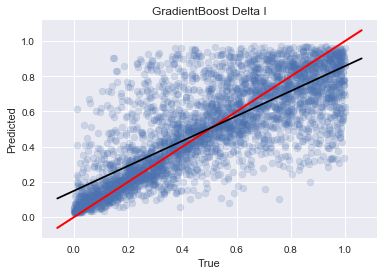

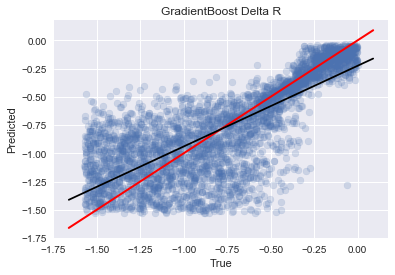

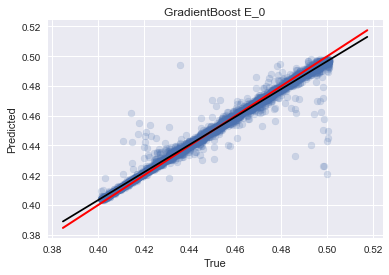

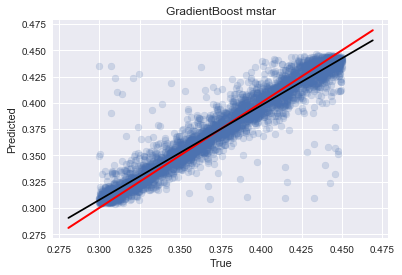

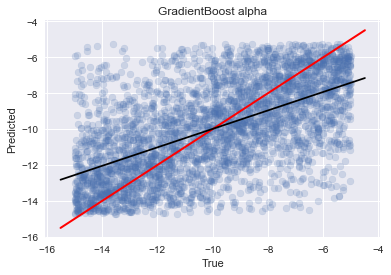

In [16]:
predictions_GB_di_sp = model_GB_di_sp.predict(X1_test)
predictions_GB_dr_sp = model_GB_dr_sp.predict(X1_test)
predictions_GB_E0_sp = model_GB_E0_sp.predict(X1_test)
predictions_GB_mstar_sp = model_GB_mstar_sp.predict(X1_test)
predictions_GB_alpha_sp = model_GB_alpha_sp.predict(X1_test)

plotSummary(Y1_test['deltaI'], predictions_GB_di_sp, 'GradientBoost Delta I')
plotSummary(Y1_test['deltaR'], predictions_GB_dr_sp, 'GradientBoost Delta R')
plotSummary(Y1_test['E_0'], predictions_GB_E0_sp, 'GradientBoost E_0')
plotSummary(Y1_test['mstar'], predictions_GB_mstar_sp, 'GradientBoost mstar')
plotSummary(Y1_test['alpha'], predictions_GB_alpha_sp, 'GradientBoost alpha')



print('Delta I Gradient Boost Score:', model_GB_di_sp.score(X1_test, Y1_test['deltaI']))
print('Delta R Gradient Boost Score:', model_GB_dr_sp.score(X1_test, Y1_test['deltaR']))


## Using the best models on the Hexagon data - peak info

### Statsmodels - peak info

 
RMSE on test data: 0.1323346386185509 for  Delta I
R^2 Score on test data: 0.7917048390615196 for Delta I
 
RMSE on test data: 0.21828061164149556 for  Delta R
R^2 Score on test data: 0.7679395244977487 for Delta R
 
RMSE on test data: 0.21828061164149556 for  Delta R Zoomed In
R^2 Score on test data: 0.7679395244977487 for Delta R Zoomed In
The average residual for predict: 0.1074
Residual is this percent of predict range 7.089 %
The average residual for predict: 0.1572
Residual is this percent of predict range 2.968 %


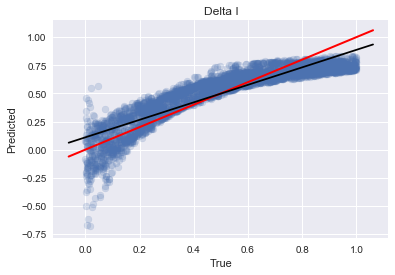

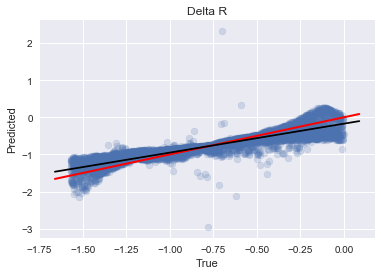

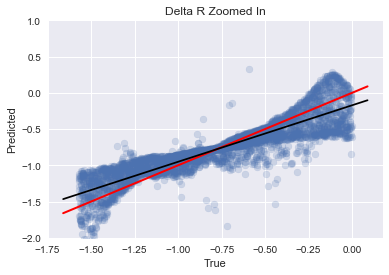

In [14]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_pi = sm.OLS(Y2_train['deltaI'], X2_train)
model_OLS_R_pi = sm.OLS(Y2_train['deltaR'], X2_train)

results_OLS_I_pi = model_OLS_I_pi.fit()
results_OLS_R_pi = model_OLS_R_pi.fit()

#Make predictions on testing data
predictions_OLS_I_pi = results_OLS_I_pi.predict(X2_test) # make the predictions by the model
predictions_OLS_R_pi = results_OLS_R_pi.predict(X2_test)

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y2_test['deltaI'], predictions_OLS_I_pi,'Delta I')
#ylim([-1,5])
plotSummary(Y2_test['deltaR'], predictions_OLS_R_pi, 'Delta R')
plotSummary(Y2_test['deltaR'], predictions_OLS_R_pi, 'Delta R Zoomed In')
ylim([-2,1])

myResiduals(Y2_test['deltaI'], predictions_OLS_I_pi)
myResiduals(Y2_test['deltaR'], predictions_OLS_R_pi)



### Decision Tree - peak info

 
RMSE on test data: 0.015558326166391823 for  deltaI Depth 60
R^2 Score on test data: 0.9971208926855749 for deltaI Depth 60
 
RMSE on test data: 0.018142982762424698 for  deltaR Depth 60
R^2 Score on test data: 0.9983967980604113 for deltaR Depth 60
 
Regression - Decision Tree -  Score:  0.9980261202951604 , using max depth of 30
 
Cross Validation Scores for regressor with max depth of  30  :  [0.99901671 0.99858955 0.99886166 0.99904329 0.99878047 0.99906151
 0.99857911 0.99906967 0.99912523 0.99911297]


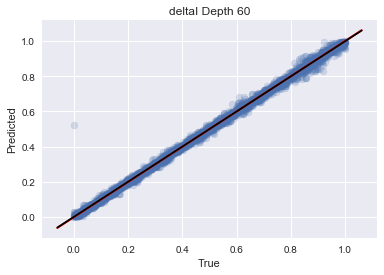

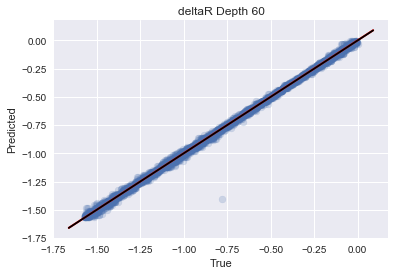

In [15]:
#Initialize the model
rs = 42
regr_DT_pi = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_pi.fit(X2_train, Y2_train)


#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_pi = regr_DT_pi.predict(X2_test)

#Plot results
plotSummary(Y2_test['deltaI'], predictions_DT_pi[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y2_test['deltaR'], predictions_DT_pi[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])


print(' ')

#Trying to understand the scoring
print('Regression - Decision Tree -  Score: ', regr_DT_pi.score(X2_test,Y2_test),', using max depth of 30')
print(' ')
regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print( 'Cross Validation Scores for regressor with max depth of ', regressor.max_depth, ' : ', cross_val_score(regressor, X1, Y1, cv=10))

### Random Forest - peak info


Score - Random Forest: 0.9987609222975464 for delta I/R 10
 
RMSE on test data: 0.01242557641524529 for  deltaI 10
R^2 Score on test data: 0.9981636088198962 for deltaI 10
 
RMSE on test data: 0.01428939992691454 for  deltaR 10
R^2 Score on test data: 0.9990055136276219 for deltaR 10


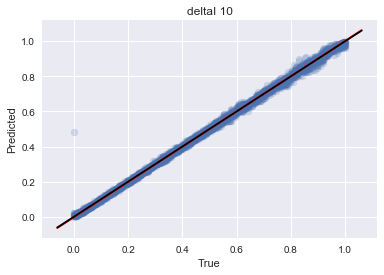

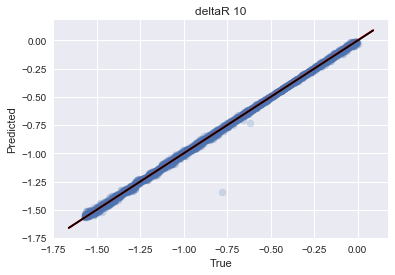

In [16]:
rs = 42
regr_RF_pi = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_pi = regr_RF_pi.fit(X2_train, Y2_train)

predictions_RF_pi = model_RF_pi.predict(X2_test)

print('')
print('Score - Random Forest:' , model_RF_pi.score(X2_test, Y2_test), 'for delta I/R 10')

plotSummary(Y2_test['deltaI'], predictions_RF_pi[:,0], 'deltaI 10')
plotSummary(Y2_test['deltaR'], predictions_RF_pi[:,1], 'deltaR 10')

### Independent Random Forests - peak info


Score - Random Forest: 0.9993056286639779 for delta I/R 10
 
RMSE on test data: 0.011940168771106823 for  deltaI 10
R^2 Score on test data: 0.9993056286639778 for deltaI 10
 
RMSE on test data: 0.009622715098903998 for  deltaR 10
R^2 Score on test data: 0.9988986449063505 for deltaR 10


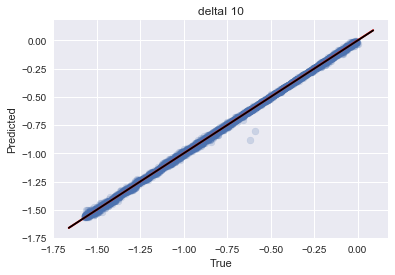

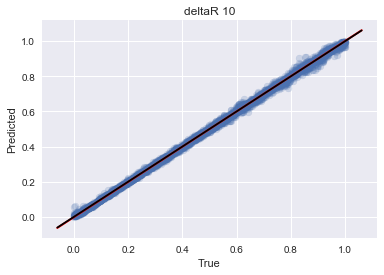

In [17]:
#Trying Independent Random Forest

rs = 42
md = 30
n = 30

regr_RF2_dr_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)

model_RF2_dr_pi = regr_RF2_dr_pi.fit(X2_train, Y2_train['deltaR'])
model_RF2_di_pi = regr_RF2_di_pi.fit(X2_train, Y2_train['deltaI'])

predictions_RF2_dr_pi = model_RF2_dr_pi.predict(X2_test)
predictions_RF2_di_pi = model_RF2_di_pi.predict(X2_test)


#importance_RF_10 = pd.Series(model_RF2.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , model_RF2_dr_pi.score(X2_test, Y2_test['deltaR']), 'for delta I/R 10')

plotSummary(Y2_test['deltaR'], predictions_RF2_dr_pi, 'deltaI 10')
plotSummary(Y2_test['deltaI'], predictions_RF2_di_pi, 'deltaR 10')

### AdaBoost Random Forests - peak info

 
RMSE on test data: 0.010288682306238148 for  AdaBoost Delta I
R^2 Score on test data: 0.9987409249332574 for AdaBoost Delta I
 
RMSE on test data: 0.011538018167259731 for  AdaBoost Delta R
R^2 Score on test data: 0.999351614505161 for AdaBoost Delta R
Delta I AdaBoost Score: 0.9987409249332575
Delta R AdaBoost Score: 0.999351614505161


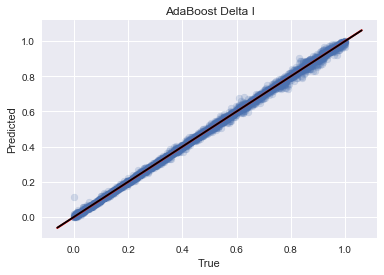

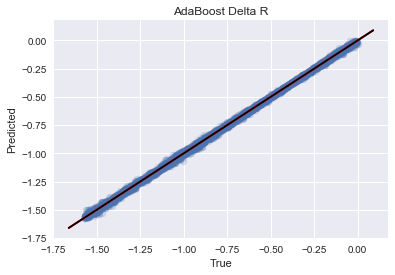

In [18]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)

model_AB_di_pi = regr_AB_di_pi.fit(X2_train, Y2_train['deltaI'])
model_AB_dr_pi = regr_AB_dr_pi.fit(X2_train, Y2_train['deltaR'])

predictions_AB_di_pi = model_AB_di_pi.predict(X2_test)
predictions_AB_dr_pi = model_AB_dr_pi.predict(X2_test)


plotSummary(Y2_test['deltaI'], predictions_AB_di_pi, 'AdaBoost Delta I')
plotSummary(Y2_test['deltaR'], predictions_AB_dr_pi, 'AdaBoost Delta R')

print('Delta I AdaBoost Score:', model_AB_di_pi.score(X2_test, Y2_test['deltaI']))
print('Delta R AdaBoost Score:', model_AB_dr_pi.score(X2_test, Y2_test['deltaR']))



### Gradient Boosting Random Forests - peak info

 
RMSE on test data: 0.016696310498640066 for  GradientBoost Delta I
R^2 Score on test data: 0.9966843159933861 for GradientBoost Delta I
 
RMSE on test data: 0.0229189233556662 for  GradientBoost Delta R
R^2 Score on test data: 0.9974416540085005 for GradientBoost Delta R
Delta I Gradient Boost Score: 0.9966843159933861
Delta R Gradient Boost Score: 0.9974416540085005


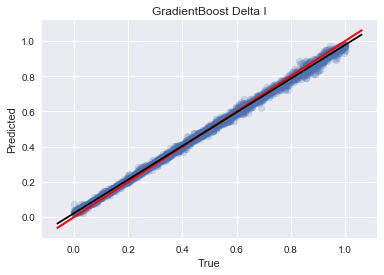

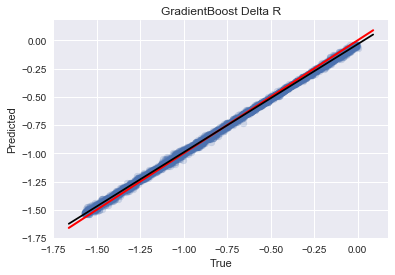

In [19]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30


regr_GB_di_pi = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_pi = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)

model_GB_di_pi = regr_GB_di_pi.fit(X2_train, Y2_train['deltaI'])

model_GB_dr_pi = regr_GB_dr_pi.fit(X2_train, Y2_train['deltaR'])

predictions_GB_di_pi = model_GB_di_pi.predict(X2_test)
predictions_GB_dr_pi = model_GB_dr_pi.predict(X2_test)

plotSummary(Y2_test['deltaI'], predictions_GB_di_pi, 'GradientBoost Delta I')
plotSummary(Y2_test['deltaR'], predictions_GB_dr_pi, 'GradientBoost Delta R')

print('Delta I Gradient Boost Score:', model_GB_di_pi.score(X2_test, Y2_test['deltaI']))
print('Delta R Gradient Boost Score:', model_GB_dr_pi.score(X2_test, Y2_test['deltaR']))



## Testing the Models on the Experimental Data



In [48]:
# Load the experimental data
col_names3 = peak_names + locs_names + width_names + prom_names
col_names4 = energy_names

exp_data_sp = pd.read_csv('Training_Data/Hexagon/HexagonExperimentalData062218_v8_specPoints.csv', header = None, names = col_names4)
exp_data_pi = pd.read_csv('Training_Data/Hexagon/HexagonExperimentalData062218_v8_peakinfo.csv', header = None, names = col_names3)

pred_phase_OLS_R_sp = results_OLS_R_sp.predict(exp_data_sp)
pred_phase_OLS_I_sp = results_OLS_I_sp.predict(exp_data_sp)

pred_phase_OLS_R_pi = results_OLS_R_pi.predict(exp_data_pi)
pred_phase_OLS_I_pi = results_OLS_I_pi.predict(exp_data_pi)

pred_phase_DT_sp = np.append(regr_DT_sp.predict(exp_data_sp),r2_score(Y1_test['deltaI'], predictions_DT_sp[:,0])).reshape(3,1).T
pred_phase_DT_sp = np.append(pred_phase_DT_sp, r2_score(Y1_test['deltaR'], predictions_DT_sp[:,1])).reshape(4,1).T
#pred_phase_DT = np.append(pred_phase_DT, r2_score(Y_test['scale_factor'], y_pred_DT[:,2]))

pred_phase_RF_sp = regr_RF_sp.predict(exp_data_sp)
pred_phase_RF_pi = regr_RF_pi.predict(exp_data_pi)

pred_phase_AB_R_sp = model_AB_dr_sp.predict(exp_data_sp)
pred_phase_AB_I_sp = model_AB_di_sp.predict(exp_data_sp)

pred_phase_AB_R_pi = model_AB_dr_pi.predict(exp_data_pi)
pred_phase_AB_I_pi = model_AB_di_pi.predict(exp_data_pi)

pred_phase_GB_di_sp = model_GB_di_sp.predict(exp_data_sp)
pred_phase_GB_dr_sp = model_GB_dr_sp.predict(exp_data_sp)

pred_phase_GB_di_pi = model_GB_di_pi.predict(exp_data_pi)
pred_phase_GB_dr_pi = model_GB_dr_pi.predict(exp_data_pi)

pred_phase_IRF_di_sp = model_RF2_di_sp.predict(exp_data_sp)
pred_phase_IRF_dr_sp = model_RF2_dr_sp.predict(exp_data_sp)

pred_phase_IRF_di_pi = model_RF2_di_pi.predict(exp_data_pi)
pred_phase_IRF_dr_pi = model_RF2_dr_pi.predict(exp_data_pi)

predictedPhases = pd.DataFrame(pred_phase_DT_sp, columns = ['deltaI', 'deltaR', 'deltaI score', 'deltaR score'], index = ['Decision Tree'])

predictedPhases.loc['OLS spec points'] = (pred_phase_OLS_I_sp[0], pred_phase_OLS_R_sp[0], r2_score(Y1_test['deltaI'],predictions_OLS_I_sp ), r2_score(Y1_test['deltaR'],predictions_OLS_R_sp ))
predictedPhases.loc['OLS peak info'] = (pred_phase_OLS_I_pi[0], pred_phase_OLS_R_pi[0], r2_score(Y2_test['deltaI'], predictions_OLS_I_pi), r2_score(Y2_test['deltaR'], predictions_OLS_R_pi))

predictedPhases.loc['Random Forest spec points'] = (pred_phase_RF_sp[0,0], pred_phase_RF_sp[0,1], r2_score(Y1_test['deltaI'], predictions_RF_sp[:,0]), r2_score(Y1_test['deltaR'], predictions_RF_sp[:,1]))
predictedPhases.loc['Random Forest peak info'] = (pred_phase_RF_pi[0,0], pred_phase_RF_pi[0,1], r2_score(Y2_test['deltaI'], predictions_RF_pi[:,0]), r2_score(Y2_test['deltaR'], predictions_RF_pi[:,1]))

predictedPhases.loc['AdaBoost spec points'] = (pred_phase_AB_I_sp[0], pred_phase_AB_R_sp[0],r2_score(Y1_test['deltaI'], predictions_AB_di_sp), r2_score(Y1_test['deltaR'], predictions_AB_dr_sp))
predictedPhases.loc['AdaBoost peak info'] = (pred_phase_AB_I_pi[0], pred_phase_AB_R_pi[0],r2_score(Y2_test['deltaI'], predictions_AB_di_pi), r2_score(Y2_test['deltaR'], predictions_AB_dr_pi))

predictedPhases.loc['Gradient Boosting spec Points'] = (pred_phase_GB_di_sp[0], pred_phase_GB_dr_sp[0],  r2_score(Y1_test['deltaI'], predictions_GB_di_sp), r2_score(Y1_test['deltaR'], predictions_GB_dr_sp))
predictedPhases.loc['Gradient Boosting peak info'] = (pred_phase_GB_di_pi[0], pred_phase_GB_dr_pi[0], r2_score(Y2_test['deltaI'], predictions_GB_di_pi), r2_score(Y2_test['deltaR'], predictions_GB_dr_pi))

predictedPhases.loc['Independent Random Forests spec Points'] = (pred_phase_IRF_di_sp[0], pred_phase_IRF_dr_sp[0],  r2_score(Y1_test['deltaI'], predictions_RF2_di_sp ), r2_score(Y1_test['deltaR'], predictions_RF2_dr_sp))
predictedPhases.loc['Independent Random Forests peak info'] = (pred_phase_IRF_di_pi[0], pred_phase_IRF_dr_pi[0], r2_score(Y2_test['deltaI'], predictions_RF2_di_pi), r2_score(Y2_test['deltaR'], predictions_RF2_dr_pi))

predictedPhases2 = predictedPhases.drop(['OLS spec points', 'OLS peak info'], axis = 0)
predictedPhases2

,deltaI,deltaR,deltaI score,deltaR score
Decision Tree,0.052557,-0.055293,0.998801,0.999428
Random Forest spec points,0.042191,-0.093350,0.999833,0.999946
Random Forest peak info,0.051863,-0.175746,0.998164,0.999006
AdaBoost spec points,0.038002,-0.170000,0.999909,0.999981
AdaBoost peak info,0.020536,-0.062475,0.998741,0.999352
Gradient Boosting spec Points,0.057034,-0.186876,0.997954,0.998147
Gradient Boosting peak info,0.040289,-0.090471,0.996684,0.997442
Independent Random Forests spec Points,0.038135,-0.171284,0.999921,0.999980
Independent Random Forests peak info,0.033019,-0.071193,0.998899,0.999306


In [49]:
#Since this prediction has a score less than 0.99, we will exclude it. 
GoodPredictedPhases = predictedPhases2

deltaI_1 = (GoodPredictedPhases['deltaI']*GoodPredictedPhases['deltaI score']).mean()
deltaR_1 = (GoodPredictedPhases['deltaR']*GoodPredictedPhases['deltaR score']).mean()

print('The weighted average for the predicted phase is: ', deltaR_1, ' + ', deltaI_1, '*i')


The weighted average for the predicted phase is:  -0.11953359961821339  +  0.04146017928122023 *i


In [44]:
exp_data_pi


,peak1,peak2,peak3,peak4,loc1,loc2,loc3,loc4,width1,width2,width3,width4,prom1,prom2,prom3,prom4
0,1.7917,1.9262,1.8662,1.4495,-0.362,-0.242,-0.074,0.134,0.026521,0.032045,0.039422,0.04612,1.1543,1.2902,1.1855,0.57098
